In [1]:
!ls

done_check.sh	       Haplotypes_1.ipynb  Raw_data_processing.py  Script_5.sh
Draw.ipynb	       jjj.png		   Script_1.sh		   Script_6.py
Endless_1_start.sh     kkk.png		   Script_2.sh		   tmp
endless.out	       lll.png		   Script_3.sh		   tmppp.png
Endless_processing.sh  nextout.txt	   Script_4_old.sh	   untitled.txt
end_proc.out	       otput_test.txt	   Script_4.sh
five_out.txt	       out.xlsx		   Script_5_fast.sh


In [2]:
! ls -1 ../Data/Affinity_results/Processed/ > tmp/list.txt

#### Data load

In [3]:
f= open("../Scripts/tmp/list.txt", "r")
N= f.read()
N= N.split("\n")[:-1]
List= []
for x in N:
    if x[:4] != "New_": List+= [x]
List.remove("human-like_peptides.txt")

In [4]:
import pandas as pd
pd.options.mode.chained_assignment = None

ColNames=["Virus","MHC_type", "MHC", "Protein", "# of high binding", "# of low binding",
          "sum_score low", "sum_score high", "low normed on protein", "high normed on protein"]
RawData= pd.DataFrame(columns= ColNames)

for I in range(1, len(List), 2):
    x= List[I]
    Path= "../Data/Affinity_results/Processed/"+x
    Panda= pd.read_csv(Path)
    Panda= Panda.drop(['Unnamed: 0'], axis=1)
    Panda= Panda.loc[Panda['Protein'] == "Raw_Proteome"]
    Panda['MHC_type']= ["II" for z in range(len(Panda))]
    RawData= pd.concat([RawData, Panda], axis=0)

for I in range(0, len(List), 2):
    x= List[I]
    Path= "../Data/Affinity_results/Processed/"+x
    Panda= pd.read_csv(Path)
    Panda= Panda.drop(['Unnamed: 0'], axis=1)
    Panda= Panda.loc[Panda['Protein'] == "Raw_Proteome"]
    Panda['MHC_type']= ["I" for z in range(len(Panda))]
    RawData= pd.concat([RawData, Panda], axis=0)
    
RawData

/tmp/ipykernel_2685827/4141161932.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  RawData= pd.concat([RawData, Panda], axis=0)


,Virus,MHC_type,MHC,Protein,# of high binding,# of low binding,sum_score low,sum_score high,low normed on protein,high normed on protein
1800,Borna,II,DRB1_0101,Raw_Proteome,184,840,97.42000,2108.55000,NaN,NaN
1801,Borna,II,DRB1_0102,Raw_Proteome,137,902,46.96000,2061.54000,NaN,NaN
1802,Borna,II,DRB1_0301,Raw_Proteome,68,773,35.27178,1537.36178,NaN,NaN
1803,Borna,II,DRB1_0302,Raw_Proteome,223,769,132.54000,2183.21000,NaN,NaN
1804,Borna,II,DRB1_0401,Raw_Proteome,233,1020,115.64000,2590.30000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
121,Zika_virus,I,HLA-C12:03,Raw_Proteome,53,269,12.94100,259.27300,0.419115,0.619408
122,Zika_virus,I,HLA-C14:02,Raw_Proteome,50,219,10.52000,209.31700,0.340707,0.500062
123,Zika_virus,I,HLA-C15:02,Raw_Proteome,70,262,16.15500,263.62600,0.523205,0.629807
124,Zika_virus,I,HLA-C16:01,Raw_Proteome,64,261,13.54500,258.66700,0.438676,0.617960


In [5]:
### before repairing only
A= list(RawData['sum_score low'])
B= list(RawData['sum_score high'])
RawData['sum_score low']= B
RawData['sum_score high']= A

A= list(RawData['low normed on protein'])
B= list(RawData['high normed on protein'])
RawData['low normed on protein']= B
RawData['high normed on protein']= A

RawData

,Virus,MHC_type,MHC,Protein,# of high binding,# of low binding,sum_score low,sum_score high,low normed on protein,high normed on protein
1800,Borna,II,DRB1_0101,Raw_Proteome,184,840,2108.55000,97.42000,NaN,NaN
1801,Borna,II,DRB1_0102,Raw_Proteome,137,902,2061.54000,46.96000,NaN,NaN
1802,Borna,II,DRB1_0301,Raw_Proteome,68,773,1537.36178,35.27178,NaN,NaN
1803,Borna,II,DRB1_0302,Raw_Proteome,223,769,2183.21000,132.54000,NaN,NaN
1804,Borna,II,DRB1_0401,Raw_Proteome,233,1020,2590.30000,115.64000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
121,Zika_virus,I,HLA-C12:03,Raw_Proteome,53,269,259.27300,12.94100,0.619408,0.419115
122,Zika_virus,I,HLA-C14:02,Raw_Proteome,50,219,209.31700,10.52000,0.500062,0.340707
123,Zika_virus,I,HLA-C15:02,Raw_Proteome,70,262,263.62600,16.15500,0.629807,0.523205
124,Zika_virus,I,HLA-C16:01,Raw_Proteome,64,261,258.66700,13.54500,0.617960,0.438676


#### Optional, norming on viral length

In [6]:
AAcid= {}
for I in range(1, len(List), 2):
    x= List[I][:-7]
    Path= "../Data/Viral_proteomes/Ready/Ready_2/"+x+".fasta"
    f= open(Path, "r")
    file= f.read()
    lines= file.split("\n")[1:-1]
    add= 0
    for y in lines:
        if len(y) != 0:
            if y[0] != ">": add+= len(y)
    AAcid[x]= add

In [7]:
RawData0= RawData.copy()
RawData= RawData.reset_index()
Tmp= list(RawData['Virus'])
Add= []
for I in range(len(Tmp)):
    x= Tmp[I]
    if RawData.loc[I]['MHC_type'] == "I": Add+= [int(AAcid[x])*4]
    if RawData.loc[I]['MHC_type'] == "II": Add+= [int(AAcid[x])*(7*2)]
RawData['Coef']= Add
RawData['val/coef']= (RawData['sum_score high']/RawData['Coef'])*10000
RawData= RawData.drop(['index'], axis=1)
RawData

,Virus,MHC_type,MHC,Protein,# of high binding,# of low binding,sum_score low,sum_score high,low normed on protein,high normed on protein,Coef,val/coef
0,Borna,II,DRB1_0101,Raw_Proteome,184,840,2108.55000,97.42000,NaN,NaN,49238,19.785532
1,Borna,II,DRB1_0102,Raw_Proteome,137,902,2061.54000,46.96000,NaN,NaN,49238,9.537349
2,Borna,II,DRB1_0301,Raw_Proteome,68,773,1537.36178,35.27178,NaN,NaN,49238,7.163528
3,Borna,II,DRB1_0302,Raw_Proteome,223,769,2183.21000,132.54000,NaN,NaN,49238,26.918234
4,Borna,II,DRB1_0401,Raw_Proteome,233,1020,2590.30000,115.64000,NaN,NaN,49238,23.485926
...,...,...,...,...,...,...,...,...,...,...,...,...
16987,Zika_virus,I,HLA-C12:03,Raw_Proteome,53,269,259.27300,12.94100,0.619408,0.419115,13676,9.462562
16988,Zika_virus,I,HLA-C14:02,Raw_Proteome,50,219,209.31700,10.52000,0.500062,0.340707,13676,7.692308
16989,Zika_virus,I,HLA-C15:02,Raw_Proteome,70,262,263.62600,16.15500,0.629807,0.523205,13676,11.812665
16990,Zika_virus,I,HLA-C16:01,Raw_Proteome,64,261,258.66700,13.54500,0.617960,0.438676,13676,9.904212


#### Analysed haplotypes

In [8]:
Haplotypes={
    "A-B-C": [["HLA-A01:01", "HLA-B08:01", "HLA-C07:01"], ["HLA-A01:01", "HLA-B45:01", "HLA-C16:01"],
              ["HLA-A01:01", "HLA-B50:01", "HLA-C06:02"], ["HLA-A02:01", "HLA-B08:01", "HLA-C07:01"],
              ["HLA-A02:01", "HLA-B40:01", "HLA-C03:01"], ["HLA-A02:01", "HLA-B15:03", "HLA-C02:02"],
              ["HLA-A02:01", "HLA-B18:01", "HLA-C07:01"], ["HLA-A02:01", "HLA-B35:01", "HLA-C04:01"],
              ["HLA-A02:03", "HLA-B46:01", "HLA-C01:02"], ["HLA-A02:07", "HLA-B15:02", "HLA-C01:02"],
              ["HLA-A01:01", "HLA-B46:01", "HLA-C01:02"], ["HLA-A02:36", "HLA-B13:02", "HLA-C04:01"],
              ["HLA-A03:01", "HLA-B07:02", "HLA-C07:02"], ["HLA-A06:02", "HLA-B40:02", "HLA-C03:04"],
              ["HLA-A11:01", "HLA-B13:01", "HLA-C03:04"], ["HLA-A11:01", "HLA-B15:01", "HLA-C04:01"],
              ["HLA-A11:01", "HLA-B15:02", "HLA-C08:01"], ["HLA-A11:01", "HLA-B38:02", "HLA-C07:02"],
              ["HLA-A11:01", "HLA-B40:01", "HLA-C07:02"], ["HLA-A02:01", "HLA-B44:02", "HLA-C05:01"],
              ["HLA-A23:01", "HLA-B15:03", "HLA-C02:02"], ["HLA-A23:01", "HLA-B52:01", "HLA-C16:01"],
              ["HLA-A24:02", "HLA-B07:02", "HLA-C07:02"], ["HLA-A24:02", "HLA-B07:02", "HLA-C07:02"],
              ["HLA-A24:02", "HLA-B35:01", "HLA-C04:01"], ["HLA-A24:02", "HLA-B51:01", "HLA-C14:02"],
              ["HLA-A24:02", "HLA-B52:01", "HLA-C12:02"], ["HLA-A24:02", "HLA-B54:01", "HLA-C01:02"],
              ["HLA-A29:02", "HLA-B44:03", "HLA-C16:01"], ["HLA-A30:01", "HLA-B13:01", "HLA-C06:03"],
              ["HLA-A30:01", "HLA-B13:02", "HLA-C06:02"], ["HLA-A30:01", "HLA-B42:01", "HLA-C17:01"],
              ["HLA-A30:02", "HLA-B53:01", "HLA-C04:01"], ["HLA-A31:08", "HLA-B13:02", "HLA-C06:02"],
              ["HLA-A33:01", "HLA-B14:02", "HLA-C08:02"], ["HLA-A33:03", "HLA-B14:05", "HLA-C05:09"],
              ["HLA-A33:03", "HLA-B44:03", "HLA-C14:03"], ["HLA-A33:03", "HLA-B58:01", "HLA-C03:02"],
              ["HLA-A66:01", "HLA-B58:01", "HLA-C06:02"], ["HLA-A74:01", "HLA-B15:03", "HLA-C02:02"]],
    "DRB1-DQ": [["DRB1_0101", "HLA-DQA10101-DQB10501"], ["DRB1_0102", "HLA-DQA10101-DQB10501"],
                ["DRB1_0301", "HLA-DQA10501-DQB10201"], ["DRB1_0401", "HLA-DQA10301-DQB10301"],
                ["DRB1_0402", "HLA-DQA10301-DQB10303"], ["DRB1_0403", "HLA-DQA10301-DQB10302"],
                ["DRB1_0405", "HLA-DQA10301-DQB10401"], ["DRB1_0407", "HLA-DQA10301-DQB10302"],
                ["DRB1_0701", "HLA-DQA10201-DQB10201"], ["DRB1_0701", "HLA-DQA10201-DQB10202"],
                ["DRB1_0802", "HLA-DQA10401-DQB10402"], ["DRB1_0804", "HLA-DQA10501-DQB10301"],
                ["DRB1_1101", "HLA-DQA10102-DQB10602"], ["DRB1_1101", "HLA-DQA10501-DQB10301"],
                ["DRB1_1102", "HLA-DQA10501-DQB10301"], ["DRB1_1104", "HLA-DQA10501-DQB10301"],
                ["DRB1_1301", "HLA-DQA10103-DQB10602"], ["DRB1_1302", "HLA-DQA10102-DQB10604"],
                ["DRB1_1402", "HLA-DQA10401-DQB10301"], ["DRB1_1402", "HLA-DQA10501-DQB10301"],
                ["DRB1_1402", "HLA-DQA10502-DQB10302"], ["DRB1_1406", "HLA-DQA10501-DQB10301"],
                ["DRB1_1501", "HLA-DQA10102-DQB10602"], ["DRB1_1502", "HLA-DQA10103-DQB10601"],
                ["DRB1_1503", "HLA-DQA10102-DQB10602"], ["DRB1_1601", "HLA-DQA10102-DQB10502"],
                ["DRB1_1602", "HLA-DQA10501-DQB10301"]],
    "A-B-C-DRB1-DQ": [["HLA-A68:01", "HLA-B08:01", "HLA-C07:02", "DRB1_0301", "HLA-DQA10501-DQB10201"],
                      ["HLA-A31:01", "HLA-B35:01", "HLA-C07:02", "DRB1_0407", "HLA-DQA10301-DQB10302"],
                      ["HLA-A02:01", "HLA-B51:01", "HLA-C01:02", "DRB1_1401", "HLA-DQA10101-DQB10503"],
                      ["HLA-A24:02", "HLA-B35:01", "HLA-C03:03", "DRB1_1202", "HLA-DQA10102-DQB10502"],
                      ["HLA-A01:01", "HLA-B57:01", "HLA-C06:02", "DRB1_0701", "HLA-DQA10201-DQB10303"],
                      ["HLA-A03:01", "HLA-B52:01", "HLA-C12:02", "DRB1_1502", "HLA-DQA10103-DQB10601"],
                      ["HLA-A30:01", "HLA-B42:01", "HLA-C17:01", "DRB1_0302", "HLA-DQA10401-DQB10402"],
                      ["HLA-A26:01", "HLA-B13:01", "HLA-C06:02", "DRB1_0701", "HLA-DQA10201-DQB10202"]]
}

#### Panda crafting

In [9]:
#ColNames=["Virus","Key", "Haplotype", "sum_score high"]
ColNames=["Virus","Key", "Haplotype", "val/coef"]
RawHaplo= pd.DataFrame(columns= ColNames)

VirNames= list(RawData['Virus'].unique())

for z in Haplotypes.keys():
    for y in Haplotypes[z]:
        HaploN= ""
        for k in y: HaploN+= k+"_"
        HaploN= HaploN[:-1]
        try:
            for x in VirNames:
                Sum= 0
                for k in y:
                    add= RawData.loc[(RawData['Virus'] == x) & (RawData['MHC'] == k), 'val/coef'].values[0]
                    Sum+= add
                Row=[x, z, HaploN, Sum]
                Row= pd.DataFrame([Row], columns= ColNames)
                RawHaplo= pd.concat([RawHaplo, Row], axis= 0)
        except: print(y, "haplotype is not available ("+k+");", x)

RawHaplo

/tmp/ipykernel_2685827/1235421593.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  RawHaplo= pd.concat([RawHaplo, Row], axis= 0)


['HLA-A01:01', 'HLA-B45:01', 'HLA-C16:01'] haplotype is not available (HLA-B45:01); Borna
['HLA-A02:01', 'HLA-B40:01', 'HLA-C03:01'] haplotype is not available (HLA-C03:01); Borna
['HLA-A02:03', 'HLA-B46:01', 'HLA-C01:02'] haplotype is not available (HLA-A02:03); Borna
['HLA-A02:07', 'HLA-B15:02', 'HLA-C01:02'] haplotype is not available (HLA-A02:07); Borna
['HLA-A01:01', 'HLA-B46:01', 'HLA-C01:02'] haplotype is not available (HLA-B46:01); Borna
['HLA-A02:36', 'HLA-B13:02', 'HLA-C04:01'] haplotype is not available (HLA-A02:36); Borna
['HLA-A06:02', 'HLA-B40:02', 'HLA-C03:04'] haplotype is not available (HLA-A06:02); Borna
['HLA-A11:01', 'HLA-B13:01', 'HLA-C03:04'] haplotype is not available (HLA-B13:01); Borna
['HLA-A11:01', 'HLA-B15:02', 'HLA-C08:01'] haplotype is not available (HLA-B15:02); Borna
['HLA-A11:01', 'HLA-B38:02', 'HLA-C07:02'] haplotype is not available (HLA-B38:02); Borna
['HLA-A24:02', 'HLA-B54:01', 'HLA-C01:02'] haplotype is not available (HLA-B54:01); Borna
['HLA-A30:

,Virus,Key,Haplotype,val/coef
0,Borna,A-B-C,HLA-A01:01_HLA-B08:01_HLA-C07:01,58.185954
0,Chikunguya,A-B-C,HLA-A01:01_HLA-B08:01_HLA-C07:01,45.511989
0,Colorado_tick_fever,A-B-C,HLA-A01:01_HLA-B08:01_HLA-C07:01,46.679830
0,Crimean_Congo,A-B-C,HLA-A01:01_HLA-B08:01_HLA-C07:01,39.013385
0,Dengue_virus,A-B-C,HLA-A01:01_HLA-B08:01_HLA-C07:01,29.201798
...,...,...,...,...
0,Vesicular_stomatitis_Indiana_virus,A-B-C-DRB1-DQ,HLA-A30:01_HLA-B42:01_HLA-C17:01_DRB1_0302_HLA...,77.969403
0,West_nile_virus,A-B-C-DRB1-DQ,HLA-A30:01_HLA-B42:01_HLA-C17:01_DRB1_0302_HLA...,62.443565
0,Yellow_fever_virus,A-B-C-DRB1-DQ,HLA-A30:01_HLA-B42:01_HLA-C17:01_DRB1_0302_HLA...,103.110106
0,Zaire_ebolavirus,A-B-C-DRB1-DQ,HLA-A30:01_HLA-B42:01_HLA-C17:01_DRB1_0302_HLA...,78.917325


#### Setting the key
keys available: "A-B-C", "DRB1-DQ", "A-B-C-DRB1-DQ"

In [20]:
Key= "DRB1-DQ"

In [21]:
HaploTable= RawHaplo.copy()

#### Table presentation

In [22]:
HaploTable= RawHaplo
HaploTable= HaploTable.loc[HaploTable['Key'] == Key, ['val/coef', 'Haplotype', 'Virus']]
HaploTable

,val/coef,Haplotype,Virus
0,29.061232,DRB1_0101_HLA-DQA10101-DQB10501,Borna
0,34.036201,DRB1_0101_HLA-DQA10101-DQB10501,Chikunguya
0,46.501762,DRB1_0101_HLA-DQA10101-DQB10501,Colorado_tick_fever
0,7.858377,DRB1_0101_HLA-DQA10101-DQB10501,Crimean_Congo
0,37.895889,DRB1_0101_HLA-DQA10101-DQB10501,Dengue_virus
...,...,...,...
0,26.868050,DRB1_1601_HLA-DQA10102-DQB10502,Vesicular_stomatitis_Indiana_virus
0,26.430654,DRB1_1601_HLA-DQA10102-DQB10502,West_nile_virus
0,33.343804,DRB1_1601_HLA-DQA10102-DQB10502,Yellow_fever_virus
0,27.284310,DRB1_1601_HLA-DQA10102-DQB10502,Zaire_ebolavirus


#### Let's draw !

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

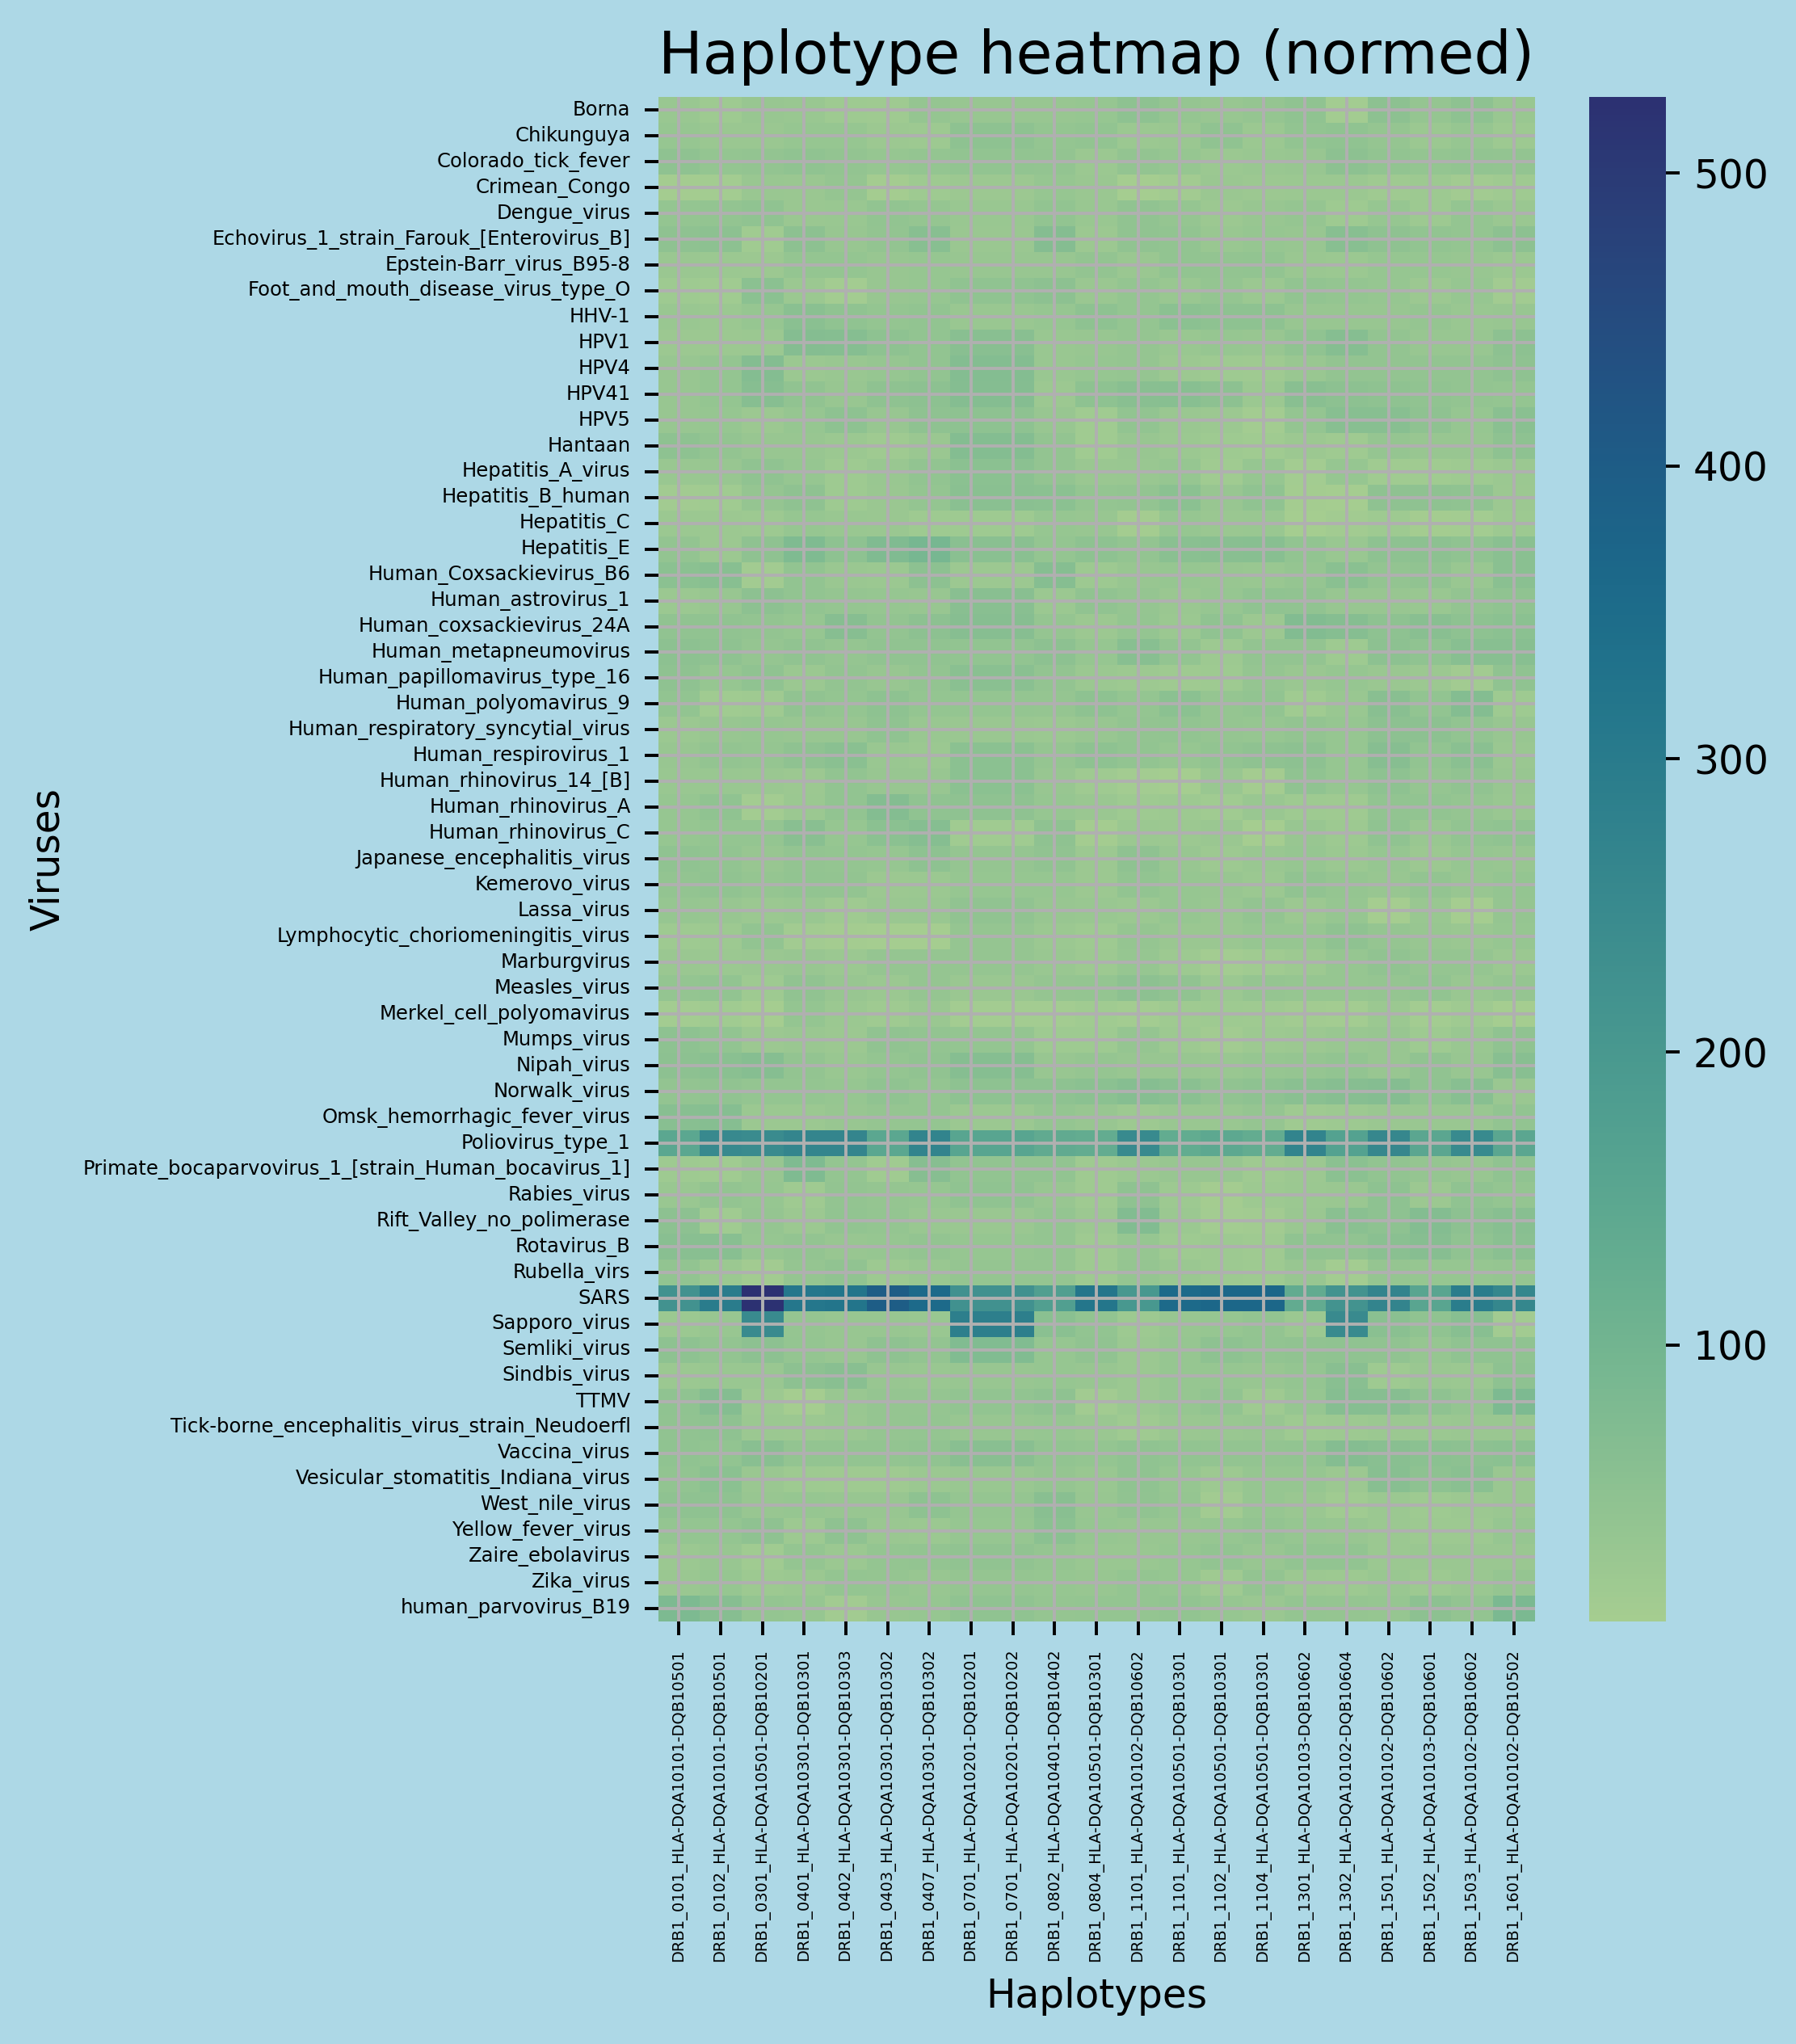

In [24]:
#### Попробуй отсортировать по медиане
HaploTableDraw= HaploTable.pivot_table(index= 'Virus', columns= 'Haplotype', values= 'val/coef', aggfunc= 'mean')

fig, axes = plt.subplots(figsize=(5, 7), dpi= 350)
sns.heatmap(data= HaploTableDraw, ax= axes, cmap= "crest", yticklabels= list(HaploTableDraw.index), xticklabels= list(HaploTableDraw.columns))
plt.xticks(fontsize= 4)
plt.yticks(fontsize= 5)
axes.set_ylabel("Viruses")
axes.set_xlabel("Haplotypes")
plt.gcf().set_facecolor('lightblue')
plt.grid()
plt.title("Haplotype heatmap (normed)", fontsize= 15)
plt.plot()
plt.savefig('tmppp.png', bbox_inches='tight')

#### No norming

In [46]:
Key= "DRB1-DQ"

/tmp/ipykernel_2685827/4269639384.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  RawData= pd.concat([RawData, Panda], axis=0)
/tmp/ipykernel_2685827/4269639384.py:51: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  RawHaplo= pd.concat([RawHaplo, Row], axis= 0)


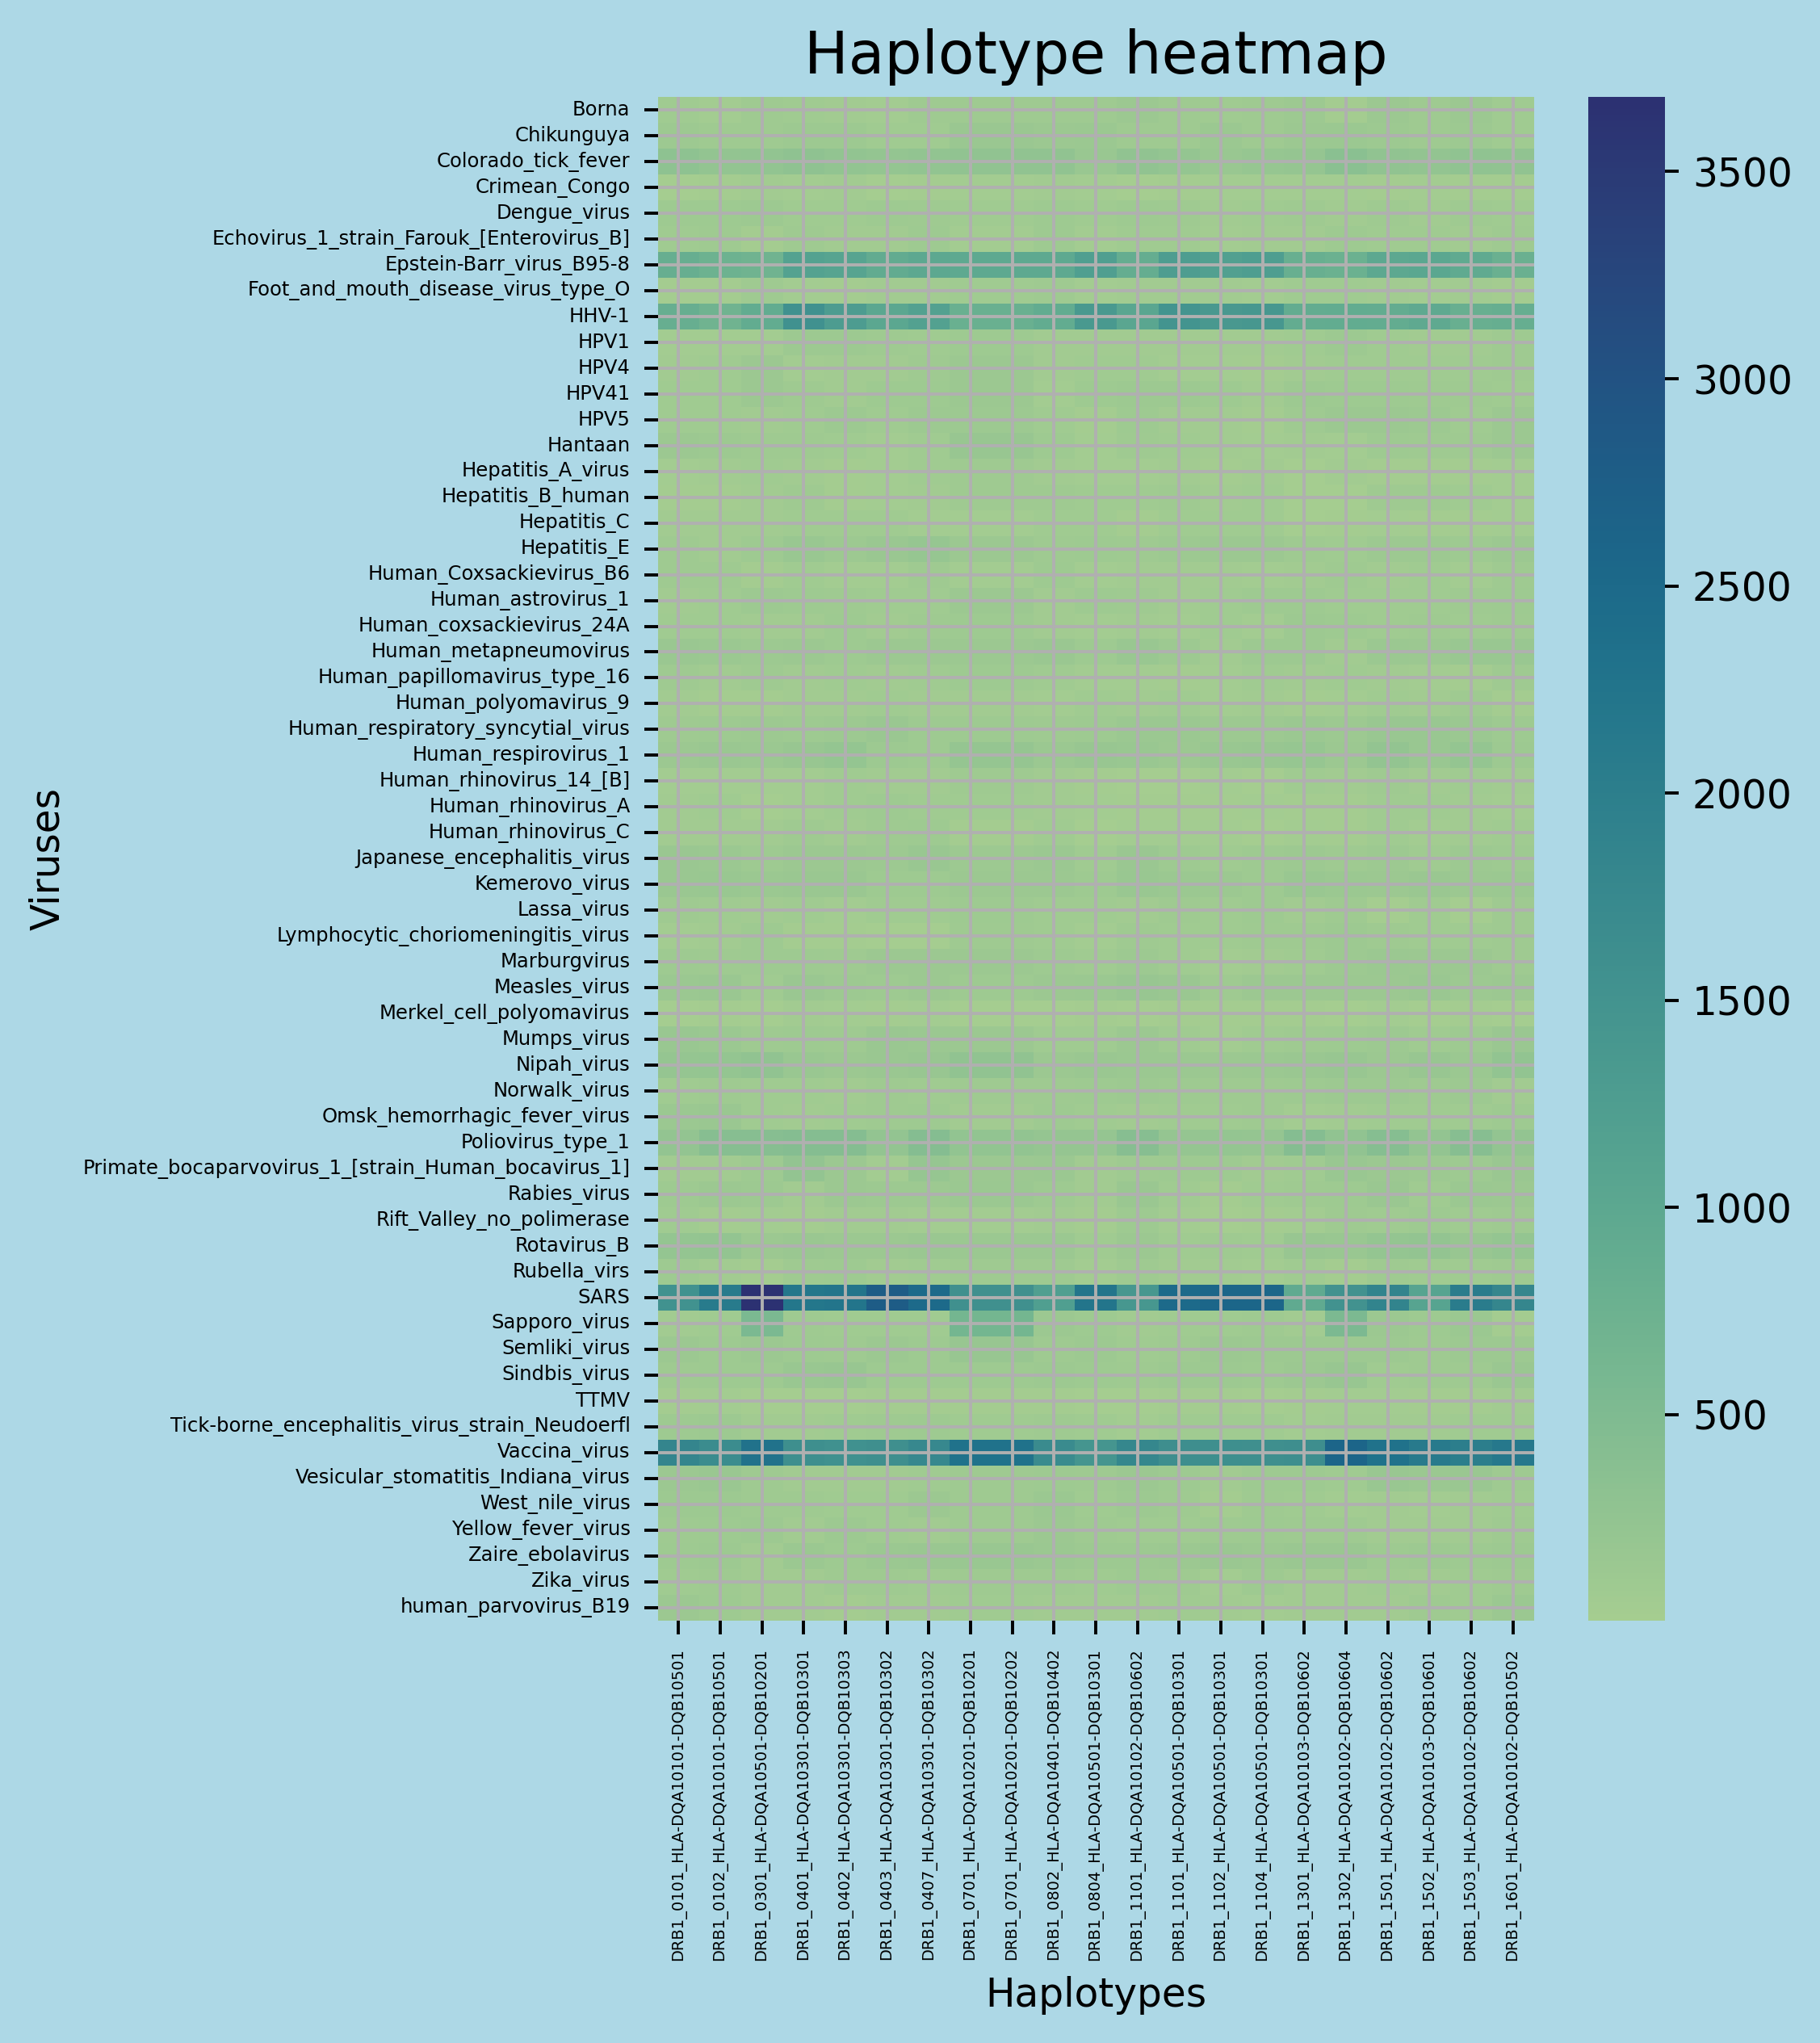

In [47]:
ColNames=["Virus","MHC_type", "MHC", "Protein", "# of high binding", "# of low binding",
          "sum_score low", "sum_score high", "low normed on protein", "high normed on protein"]
RawData= pd.DataFrame(columns= ColNames)

for I in range(1, len(List), 2):
    x= List[I]
    Path= "../Data/Affinity_results/Processed/"+x
    Panda= pd.read_csv(Path)
    Panda= Panda.drop(['Unnamed: 0'], axis=1)
    Panda= Panda.loc[Panda['Protein'] == "Raw_Proteome"]
    Panda['MHC_type']= ["II" for z in range(len(Panda))]
    Panda['sum_score low']= Panda['sum_score low'].div(2)
    RawData= pd.concat([RawData, Panda], axis=0)
for I in range(0, len(List), 2):
    x= List[I]
    Path= "../Data/Affinity_results/Processed/"+x
    Panda= pd.read_csv(Path)
    Panda= Panda.drop(['Unnamed: 0'], axis=1)
    Panda= Panda.loc[Panda['Protein'] == "Raw_Proteome"]
    Panda['MHC_type']= ["I" for z in range(len(Panda))]
    RawData= pd.concat([RawData, Panda], axis=0)

### before repairing only
A= list(RawData['sum_score low'])
B= list(RawData['sum_score high'])
RawData['sum_score low']= B
RawData['sum_score high']= A
A= list(RawData['low normed on protein'])
B= list(RawData['high normed on protein'])
RawData['low normed on protein']= B
RawData['high normed on protein']= A

ColNames=["Virus", "Key", "Haplotype", "sum_score high"]
RawHaplo= pd.DataFrame(columns= ColNames)

VirNames= list(RawData['Virus'].unique())

for z in Haplotypes.keys():
    for y in Haplotypes[z]:
        HaploN= ""
        for k in y: HaploN+= k+"_"
        HaploN= HaploN[:-1]
        try:
            for x in VirNames:
                Sum= 0
                for k in y:
                    add= RawData.loc[(RawData['Virus'] == x) & (RawData['MHC'] == k), 'sum_score high'].values[0]
                    Sum+= add
                Row=[x, z, HaploN, Sum]
                Row= pd.DataFrame([Row], columns= ColNames)
                RawHaplo= pd.concat([RawHaplo, Row], axis= 0)
        except: None

HaploTable= RawHaplo.copy()
HaploTable= HaploTable.loc[HaploTable['Key'] == Key, ['sum_score high', 'Haplotype', 'Virus']]

HaploTableDraw= HaploTable.pivot_table(index= 'Virus', columns= 'Haplotype', values= 'sum_score high', aggfunc= 'mean')

fig, axes = plt.subplots(figsize=(5, 7), dpi= 350)
sns.heatmap(data= HaploTableDraw, ax= axes, cmap= "crest", yticklabels= list(HaploTableDraw.index), xticklabels= list(HaploTableDraw.columns))
plt.xticks(fontsize= 4)
plt.yticks(fontsize= 5)
axes.set_ylabel("Viruses")
axes.set_xlabel("Haplotypes")
plt.gcf().set_facecolor('lightblue')
plt.grid()
plt.title("Haplotype heatmap", fontsize= 15)
plt.plot()
plt.savefig('tmppp.png', bbox_inches='tight')